In [13]:
# -------------------------------------------------
# Initial import.
# -------------------------------------------------

import numpy as np
import matplotlib,pylab as plt
import tensorflow as tf
import keras
from scipy.io import loadmat 

from keras.layers import Input, Dense, Activation, Embedding, LSTM, Flatten

from keras.models import Model, Sequential
from keras.utils import np_utils

In [14]:
dataset = loadmat('detop_exp01_subj22_Sess1_003.mat')

In [15]:
type(dataset)

dict

In [16]:
dataset

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jun  5 19:43:35 2018',
 '__version__': '1.0',
 'channels_emg': array([u'MA1 ', u'MA2 ', u'MA3 ', u'MA4 ', u'MA5 ', u'MA6 ', u'MA7 ',
        u'MA8 ', u'MA9 ', u'MB1 ', u'MB2 ', u'MB3 ', u'MB4 ', u'MB4 ',
        u'MB5 ', u'MB6 ', u'MB7 ', u'MB9 ', u'MC1 ', u'MC2 ', u'MC3 ',
        u'MC4 ', u'MC5 ', u'MC6 ', u'MC7 ', u'MC8 ', u'MC9 ', u'MD1 ',
        u'MD2 ', u'MD3 ', u'MD4 ', u'MD5 ', u'MD6 ', u'MD7 ', u'MD8 ',
        u'MD9 ', u'ME1 ', u'ME2 ', u'ME3 ', u'ME4 ', u'ME5 ', u'ME6 ',
        u'ME7 ', u'ME8 ', u'ME9 ', u'MF1 ', u'MF2 ', u'MF3 ', u'MF4 ',
        u'MF5 ', u'MF6 ', u'MF7 ', u'MF8 ', u'MF9 ', u'MG1 ', u'MG2 ',
        u'MG3 ', u'MG4 ', u'MG5 ', u'MG6 ', u'MG7 ', u'MG8 ', u'MG9 ',
        u'MH1 ', u'MH2 ', u'MH3 ', u'MH4 ', u'MH5 ', u'MH6 ', u'MH7 ',
        u'MH8 ', u'MH9 ', u'MI1 ', u'MI2 ', u'MI3 ', u'MI4 ', u'MI5 ',
        u'MI6 ', u'MI7 ', u'MI8 ', u'MI9 ', u'MJ1 ', u'MJ2 ', u'MJ3 

In [17]:
keys_name = dataset.keys()
keys_name

['emg',
 'fs',
 'channels_glove',
 'channels_emg',
 '__header__',
 'glove',
 '__globals__',
 'session',
 'movement',
 'date',
 '__version__',
 'subject']

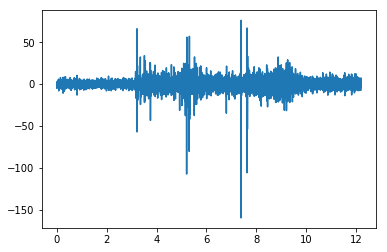

In [18]:
y1 = dataset['glove'][0]
y2 = dataset['emg'][125]
time = np.zeros(len(y1))

for i in range(0, len(y1)):
    time[i] = float(i)/2048

plt.plot(time[0:25000], y2[0:25000])
plt.show()

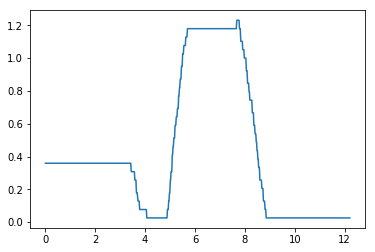

In [19]:
plt.plot(time[0:25000], y1[0:25000])
plt.show()

/home/mlvm2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until


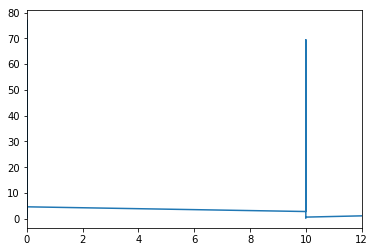

In [22]:
cutnum = len(y2)%40

y2_cut = np.delete(y2, [len(y1) - cutnum, len(y1)])

y2_process1 = np.zeros(int(len(y2_cut)/10))

for i in range(0, int(len(y2_cut)/10)):
    for j in range(0, 10):
        y2_process1[i] = y2_process1[i] + abs(y2_cut[10*i+j])
        
y2_process1 = y2_process1 / 10

time2 = np.zeros(int(len(y2_cut)/10))

for i in range(0, int(len(y2_cut)/10)):
    time2[i] = i/2048*10

y2_process2 = np.zeros(shape = (int(len(y2_process1)/4), 4))

for i in range(0, int(len(y2_process1)/4)):
    for j in range(0,4):
        y2_process2[i,j] = y2_process1[i*4+j]

y2_process2.shape
plt.plot(time2, y2_process1)
plt.xlim(0,12)
plt.show()

In [99]:
y1_cut = np.delete(y1, [len(y1) - cutnum, len(y1)])

y1_process1 = np.zeros(int(len(y1_cut)/40))

for i in range(0, int(len(y1_cut)/40)-1):
    y1_process1[i] = y1_cut[40*(i+1)] - y1_cut[40*i]

y1_process1

/home/mlvm2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


array([0., 0., 0., ..., 0., 0., 0.])

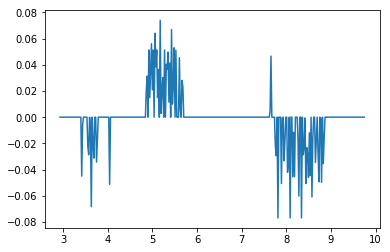

0.0
[2.00950128 1.79972666 1.60479667 3.9610089 ]


In [100]:
time3 = np.zeros(int(len(y2_cut)/40))

for i in range(0, int(len(y2_cut)/40)):
    time3[i] = float(i)/2048*40
    
plt.plot(time3[150:500], y1_process1[150:500])
plt.show()
print(y1_process1[160])
print(y2_process2[160])

In [74]:
y1_process2 = y1_process1[150:500]
y2_process3 = y2_process2[150:500]

In [101]:
t_s_x = y2_process2
t_s_angles = y1_process1

In [102]:
print(t_s_x)
print(t_s_angles)

[[1.56199108 2.10081786 2.25702037 1.32003597]
 [1.44017024 1.51988303 1.16753951 1.47571428]
 [1.54037463 2.40046962 1.2719951  1.90575008]
 ...
 [2.12892981 1.45050087 2.56442351 6.0102502 ]
 [2.46912285 4.20694324 1.47371772 1.44096095]
 [1.05336008 0.6576767  4.25798275 8.28719068]]
[0. 0. 0. ... 0. 0. 0.]


In [103]:
t_s_x = t_s_x.reshape(-1, 4, 1)
t_s_x

array([[[1.56199108],
        [2.10081786],
        [2.25702037],
        [1.32003597]],

       [[1.44017024],
        [1.51988303],
        [1.16753951],
        [1.47571428]],

       [[1.54037463],
        [2.40046962],
        [1.2719951 ],
        [1.90575008]],

       ...,

       [[2.12892981],
        [1.45050087],
        [2.56442351],
        [6.0102502 ]],

       [[2.46912285],
        [4.20694324],
        [1.47371772],
        [1.44096095]],

       [[1.05336008],
        [0.6576767 ],
        [4.25798275],
        [8.28719068]]])

In [104]:
permutation = np.random.permutation(t_s_angles.shape[0])
shuffled_t_s_x = t_s_x[permutation, :]
shuffled_t_s_angles = t_s_angles[permutation]

In [105]:
print(shuffled_t_s_x)
print(shuffled_t_s_angles)

[[[5.56704027]
  [2.02763656]
  [5.23468029]
  [0.72041714]]

 [[1.07146292]
  [5.23546252]
  [1.83173614]
  [0.74542187]]

 [[0.93836213]
  [2.70151795]
  [5.29140131]
  [5.14227791]]

 ...

 [[4.95518702]
  [2.74396612]
  [4.6084922 ]
  [5.81008561]]

 [[6.07659609]
  [1.96374925]
  [3.72929137]
  [7.68499743]]

 [[0.55789965]
  [1.72450236]
  [1.63610844]
  [2.07052049]]]
[0.         0.         0.         ... 0.02983328 0.         0.        ]


In [27]:
# -------------------------------------------------
# Global Parameters Declaration.
# -------------------------------------------------

BATCH_SIZE = 1 # Batch size, wait for data pre-processing finished.
MAX_STEPS = 4 # Maximum length of one sample (time-series data), wait for data pre-processing finished.
ITERS = 1 # How many generator iterations to train for, wait for data pre-processing finished.
LR = 0.1 # Learning rate, COPY from origin programe.
Timeseries_features = 1 # Time-series feature size,if only use average value per 50ms then it would be 1.
                       # However, considering about the possibility of using sEMG image, it could be much more larger.
NUM_ANGLES = 0 # Numbers of angles, depends on how exact i want, wait for data pre-processing finished.
LSTM_UNIT = 4 # Numbers of LSTM unit, depends on how many steps i want,wait for data pre-processing.

In [106]:
# -------------------------------------------------
# Dividing Training Data and Testing Data.
# Wait for data pre-processing finished.
# -------------------------------------------------

train_t_s_x = shuffled_t_s_x[0:2400]
train_t_s_angles = shuffled_t_s_angles[0:2400]
test_t_s_x = shuffled_t_s_x[2400:]
test_t_s_angles = shuffled_t_s_angles[2400:]

print(train_t_s_x.shape)
print(train_t_s_angles.shape)
print(test_t_s_x.shape)
print(test_t_s_angles.shape)

(2400, 4, 1)
(2400,)
(239, 4, 1)
(239,)


In [107]:
test_t_s_x

array([[[ 2.38648197],
        [ 8.46769251],
        [ 6.47768955],
        [ 7.22872068]],

       [[ 0.4968485 ],
        [ 1.84448474],
        [ 2.40855132],
        [ 4.88702835]],

       [[ 1.25905393],
        [ 1.10655656],
        [ 2.15323108],
        [ 2.64001334]],

       [[ 8.63353943],
        [ 6.02644921],
        [ 5.66327767],
        [ 1.91172646]],

       [[ 7.72165979],
        [ 6.92512424],
        [ 3.99899886],
        [ 3.90539345]],

       [[11.86984112],
        [10.12689497],
        [ 3.0279887 ],
        [ 3.60581872]],

       [[15.99950732],
        [ 5.53022389],
        [ 1.68349818],
        [ 4.97283302]],

       [[ 1.872007  ],
        [ 4.46185262],
        [ 2.95782167],
        [ 1.0893984 ]],

       [[ 4.92158442],
        [ 3.53100872],
        [ 3.54230759],
        [ 8.40893703]],

       [[ 3.22163061],
        [ 3.19638431],
        [ 6.92607871],
        [ 3.80604635]],

       [[ 5.44387684],
        [ 2.02266793],
        [ 5.52

In [41]:
tf.reset_default_graph()

# -------------------------------------------------
# T-S RNN Structrue.
# -------------------------------------------------

W_1 = tf.Variable(tf.random_normal([LSTM_UNIT, 1]))
#bias1 = tf.Variable(tf.constant(0.1, shape = [1, ]))
bias1 = tf.Variable(tf.zeros(1))
W_2 = tf.Variable(tf.random_normal([LSTM_UNIT, 1]))
bias2 = tf.Variable(tf.constant(0.1, shape = [1, ]))

def TSRNN(t_s_input):
    
    t_s_input = tf.reshape(t_s_input, [-1, MAX_STEPS, Timeseries_features])
    
    print(t_s_input.shape)
    
    cell = tf.contrib.rnn.BasicLSTMCell(LSTM_UNIT)
    init_state = cell.zero_state(BATCH_SIZE, tf.float32)
    lstm_output, final_state = tf.nn.dynamic_rnn(cell, t_s_input, initial_state=init_state)
    
    print(lstm_output.shape)
    print(final_state)
    
    lstm_output = tf.reshape(lstm_output, [-1, LSTM_UNIT])
    
    print(lstm_output.shape)
    
    pred_angle = tf.matmul(lstm_output, W_1) + bias1 # tanh?
    
    pred_angle = tf.reshape(pred_angle, [-1, LSTM_UNIT])
    
    pred_angle = tf.tanh(tf.matmul(pred_angle, W_2) +bias2)
    
    print(pred_angle.shape, )
    
    return pred_angle

# -------------------------------------------------
# T-S RNN Model Training.
# -------------------------------------------------

def Train_TSRNN():
    # Place Holder before training the nets.
    t_s_X = tf.placeholder(tf.float32, shape = [MAX_STEPS])
    t_s_Y = tf.placeholder(tf.float32, shape = []) # Not sure it is correct?
    
    train_data = train_t_s_x
    train_label = train_t_s_angles
    
    pred =  TSRNN(t_s_X)
    
    loss = tf.square(pred - t_s_Y)
    train_op = tf.train.AdamOptimizer(LR).minimize(loss) # optimizer?
    
    #train_op = tf.train.RMSPropOptimizer(learning_rate=LR).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        for i in range(0, 2400):
            _, loss_currency = sess.run([loss, train_op], feed_dict={t_s_X: train_data[i], t_s_Y: train_label[i]})
            
            print(loss_currency)

In [42]:
Train_TSRNN()

(1, 4, 1)
(1, 4, 4)
LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(1, 4) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(1, 4) dtype=float32>)
(4, 4)
(TensorShape([Dimension(1), Dimension(1)]),)
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [85]:
# --------------------------------------------------------
# keras model.
# --------------------------------------------------------

model = Sequential()
model.add(LSTM(4, input_shape = (4, 1), kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(train_t_s_x, train_t_s_angles, epochs = 200, batch_size = 10, verbose = 2)

Epoch 1/200
 - 1s - loss: 0.0125
Epoch 2/200
 - 1s - loss: 0.0058
Epoch 3/200
 - 1s - loss: 0.0048
Epoch 4/200
 - 1s - loss: 0.0045
Epoch 5/200
 - 1s - loss: 0.0042
Epoch 6/200
 - 1s - loss: 0.0038
Epoch 7/200
 - 1s - loss: 0.0035
Epoch 8/200
 - 1s - loss: 0.0032
Epoch 9/200
 - 1s - loss: 0.0029
Epoch 10/200
 - 1s - loss: 0.0026
Epoch 11/200
 - 1s - loss: 0.0023
Epoch 12/200
 - 1s - loss: 0.0020
Epoch 13/200
 - 1s - loss: 0.0017
Epoch 14/200
 - 1s - loss: 0.0015
Epoch 15/200
 - 1s - loss: 0.0012
Epoch 16/200
 - 2s - loss: 0.0010
Epoch 17/200
 - 1s - loss: 8.8097e-04
Epoch 18/200
 - 2s - loss: 7.4459e-04
Epoch 19/200
 - 2s - loss: 6.3371e-04
Epoch 20/200
 - 1s - loss: 5.4806e-04
Epoch 21/200
 - 1s - loss: 4.8394e-04
Epoch 22/200
 - 1s - loss: 4.3970e-04
Epoch 23/200
 - 1s - loss: 4.0869e-04
Epoch 24/200
 - 1s - loss: 3.8729e-04
Epoch 25/200
 - 2s - loss: 3.7644e-04
Epoch 26/200
 - 1s - loss: 3.7001e-04
Epoch 27/200
 - 1s - loss: 3.7036e-04
Epoch 28/200
 - 2s - loss: 3.6737e-04
Epoch 29/

KeyboardInterrupt: 

In [109]:
test_prediction = model.predict(test_t_s_x)

In [111]:
test_prediction = test_prediction.reshape(239)
print(test_prediction)

[-0.00218965 -0.00156973 -0.00151636 -0.0021752  -0.00210756 -0.00231038
 -0.00217554 -0.00171134 -0.00189348 -0.00198115 -0.00193305 -0.00155983
 -0.00161988 -0.00149475 -0.00143346 -0.00204577 -0.00159641 -0.00140504
 -0.0018962  -0.00174359 -0.0015318  -0.00165835 -0.00179994 -0.00213962
 -0.00160372 -0.0021037  -0.00159118 -0.00232014 -0.00177411 -0.00169848
 -0.00173768 -0.00192762 -0.00148601 -0.00177372 -0.00212688 -0.00213159
 -0.00276278 -0.00154223 -0.00164466 -0.00164868 -0.00215752 -0.00207897
 -0.00170322 -0.00175519 -0.00161084 -0.00154297 -0.00157337 -0.00192717
 -0.00208839 -0.00183336 -0.00243079 -0.00148039 -0.00148172 -0.00163083
 -0.00255007 -0.00170055 -0.00236322 -0.00191521 -0.00199968 -0.00323355
 -0.00150361 -0.00195289 -0.0015041  -0.00178637 -0.00229606 -0.00216745
 -0.0016707  -0.00329752 -0.00171073 -0.00184391 -0.00152407 -0.00185972
 -0.0025362  -0.0019437  -0.00159781 -0.00198131 -0.00179922 -0.00208314
 -0.00151678 -0.00220567 -0.00154781 -0.00206479 -0

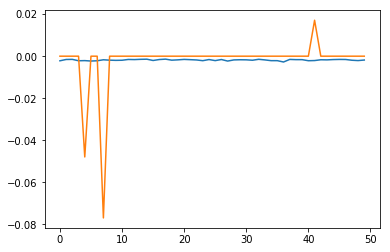

In [112]:
time_test = np.zeros(50)

for i in range(0, 50):
    time_test[i] = i

time_test = time_test[0:50]
test_prediction = test_prediction[0:50]

plt.plot(time_test, test_prediction, time_test, test_t_s_angles[0:50])
plt.show()